# PREDICT CUSTOMER DEFAULT OF CREDIT

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import OrderedDict
import seaborn as sns
from pandas.tools import plotting
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [3]:
train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

In [4]:
train.head()


,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
0,1,30000.0,1,1,2,40,24607.0,24430.0,23881.0,0
1,2,20000.0,1,1,2,41,17040.0,16474.0,17203.0,0
2,3,20000.0,1,1,2,36,17332.0,18600.0,17947.0,0
3,4,20000.0,1,1,2,35,2003.0,2948.0,3372.0,0
4,5,170000.0,1,1,2,38,171465.0,145196.0,110163.0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 10 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


In [6]:
train.groupby('TARGET').count()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3
TARGET,,,,,,,,,
0,9989,9989,9989,9989,9989,9989,9989,9989,9989
1,6636,6636,6636,6636,6636,6636,6636,6636,6636


In [7]:
pd.crosstab(train['EDUCATION'],train['TARGET'],margins=True).style.background_gradient(cmap='summer_r')

TARGET,0,1,All
EDUCATION,,,
1,2792,1237,4029
2,4095,2830,6925
3,2923,2436,5359
4,179,133,312
All,9989,6636,16625


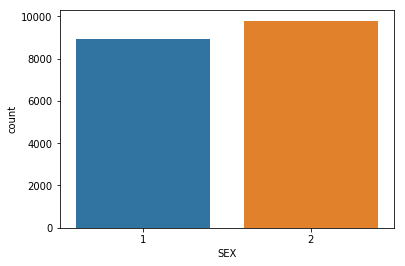

In [8]:
sns.countplot(x='MARRIAGE', data=train)
sns.countplot(x='SEX', data=train)


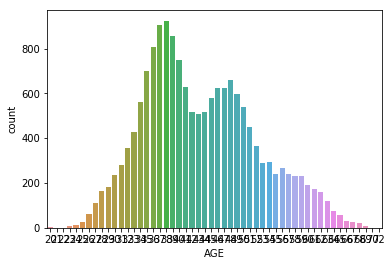

In [15]:
sns.countplot(x = 'AGE',data = train)

In [32]:

train.drop(train[train.AGE >= 65].index, inplace=True)


ID           0
LIMIT_BAL    0
MARRIAGE     0
EDUCATION    0
SEX          0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
TARGET       0
dtype: int64

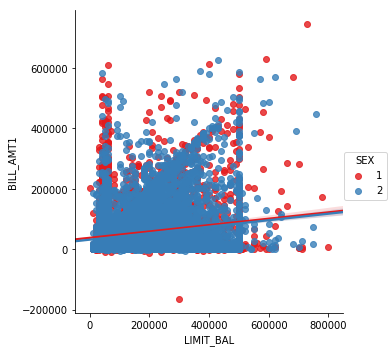

In [10]:
sns.lmplot(x='LIMIT_BAL', y = 'BILL_AMT1', data=train, hue='SEX',palette='Set1') #linear model plot. Linear model + regresi

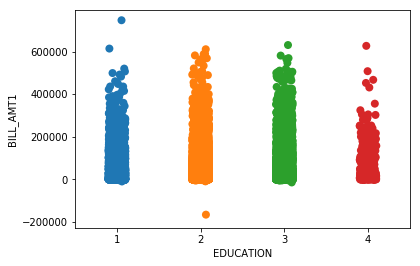

In [11]:
sns.stripplot(x='EDUCATION', y = 'BILL_AMT1', data=train, size=8, jitter=True) #jitter untuk mecah garis
#plt.ylabel('tip($)')
#plt.title('Tip Distribution')

In [12]:
pd.crosstab(train["TARGET"],train["LIMIT_BAL"],margins=True).style.background_gradient(cmap='summer_r')

LIMIT_BAL,0.0,10000.0,16000.0,20000.0,30000.0,40000.0,50000.0,60000.0,70000.0,80000.0,90000.0,100000.0,110000.0,120000.0,130000.0,140000.0,150000.0,160000.0,170000.0,180000.0,190000.0,200000.0,210000.0,220000.0,230000.0,240000.0,250000.0,260000.0,270000.0,280000.0,290000.0,300000.0,310000.0,320000.0,330000.0,340000.0,350000.0,360000.0,370000.0,380000.0,390000.0,400000.0,410000.0,420000.0,430000.0,440000.0,450000.0,460000.0,470000.0,480000.0,490000.0,500000.0,510000.0,520000.0,530000.0,540000.0,550000.0,560000.0,570000.0,580000.0,590000.0,600000.0,610000.0,620000.0,630000.0,640000.0,660000.0,680000.0,690000.0,700000.0,710000.0,730000.0,750000.0,760000.0,780000.0,800000.0,All
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,124,1,563,433,53,1063,254,202,530,198,339,200,258,245,245,375,226,200,368,80,547,246,147,260,233,147,162,101,192,117,183,108,129,67,78,83,303,26,59,64,96,32,65,28,25,59,29,27,32,28,274,8,10,3,2,10,2,3,5,4,7,2,6,2,3,2,2,1,4,3,1,2,1,1,1,9989
1,1,3,0,39,218,787,1363,1111,34,74,126,154,182,202,143,113,79,102,87,126,110,103,102,75,79,86,80,93,87,78,84,77,72,66,50,51,58,45,43,52,37,40,34,31,18,12,13,9,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6636
All,1,127,1,602,651,840,2426,1365,236,604,324,493,382,460,388,358,454,328,287,494,190,650,348,222,339,319,227,255,188,270,201,260,180,195,117,129,141,348,69,111,101,136,66,96,46,37,72,38,31,33,29,275,8,10,3,2,10,2,3,5,4,7,2,6,2,3,2,2,1,4,3,1,2,1,1,1,16625


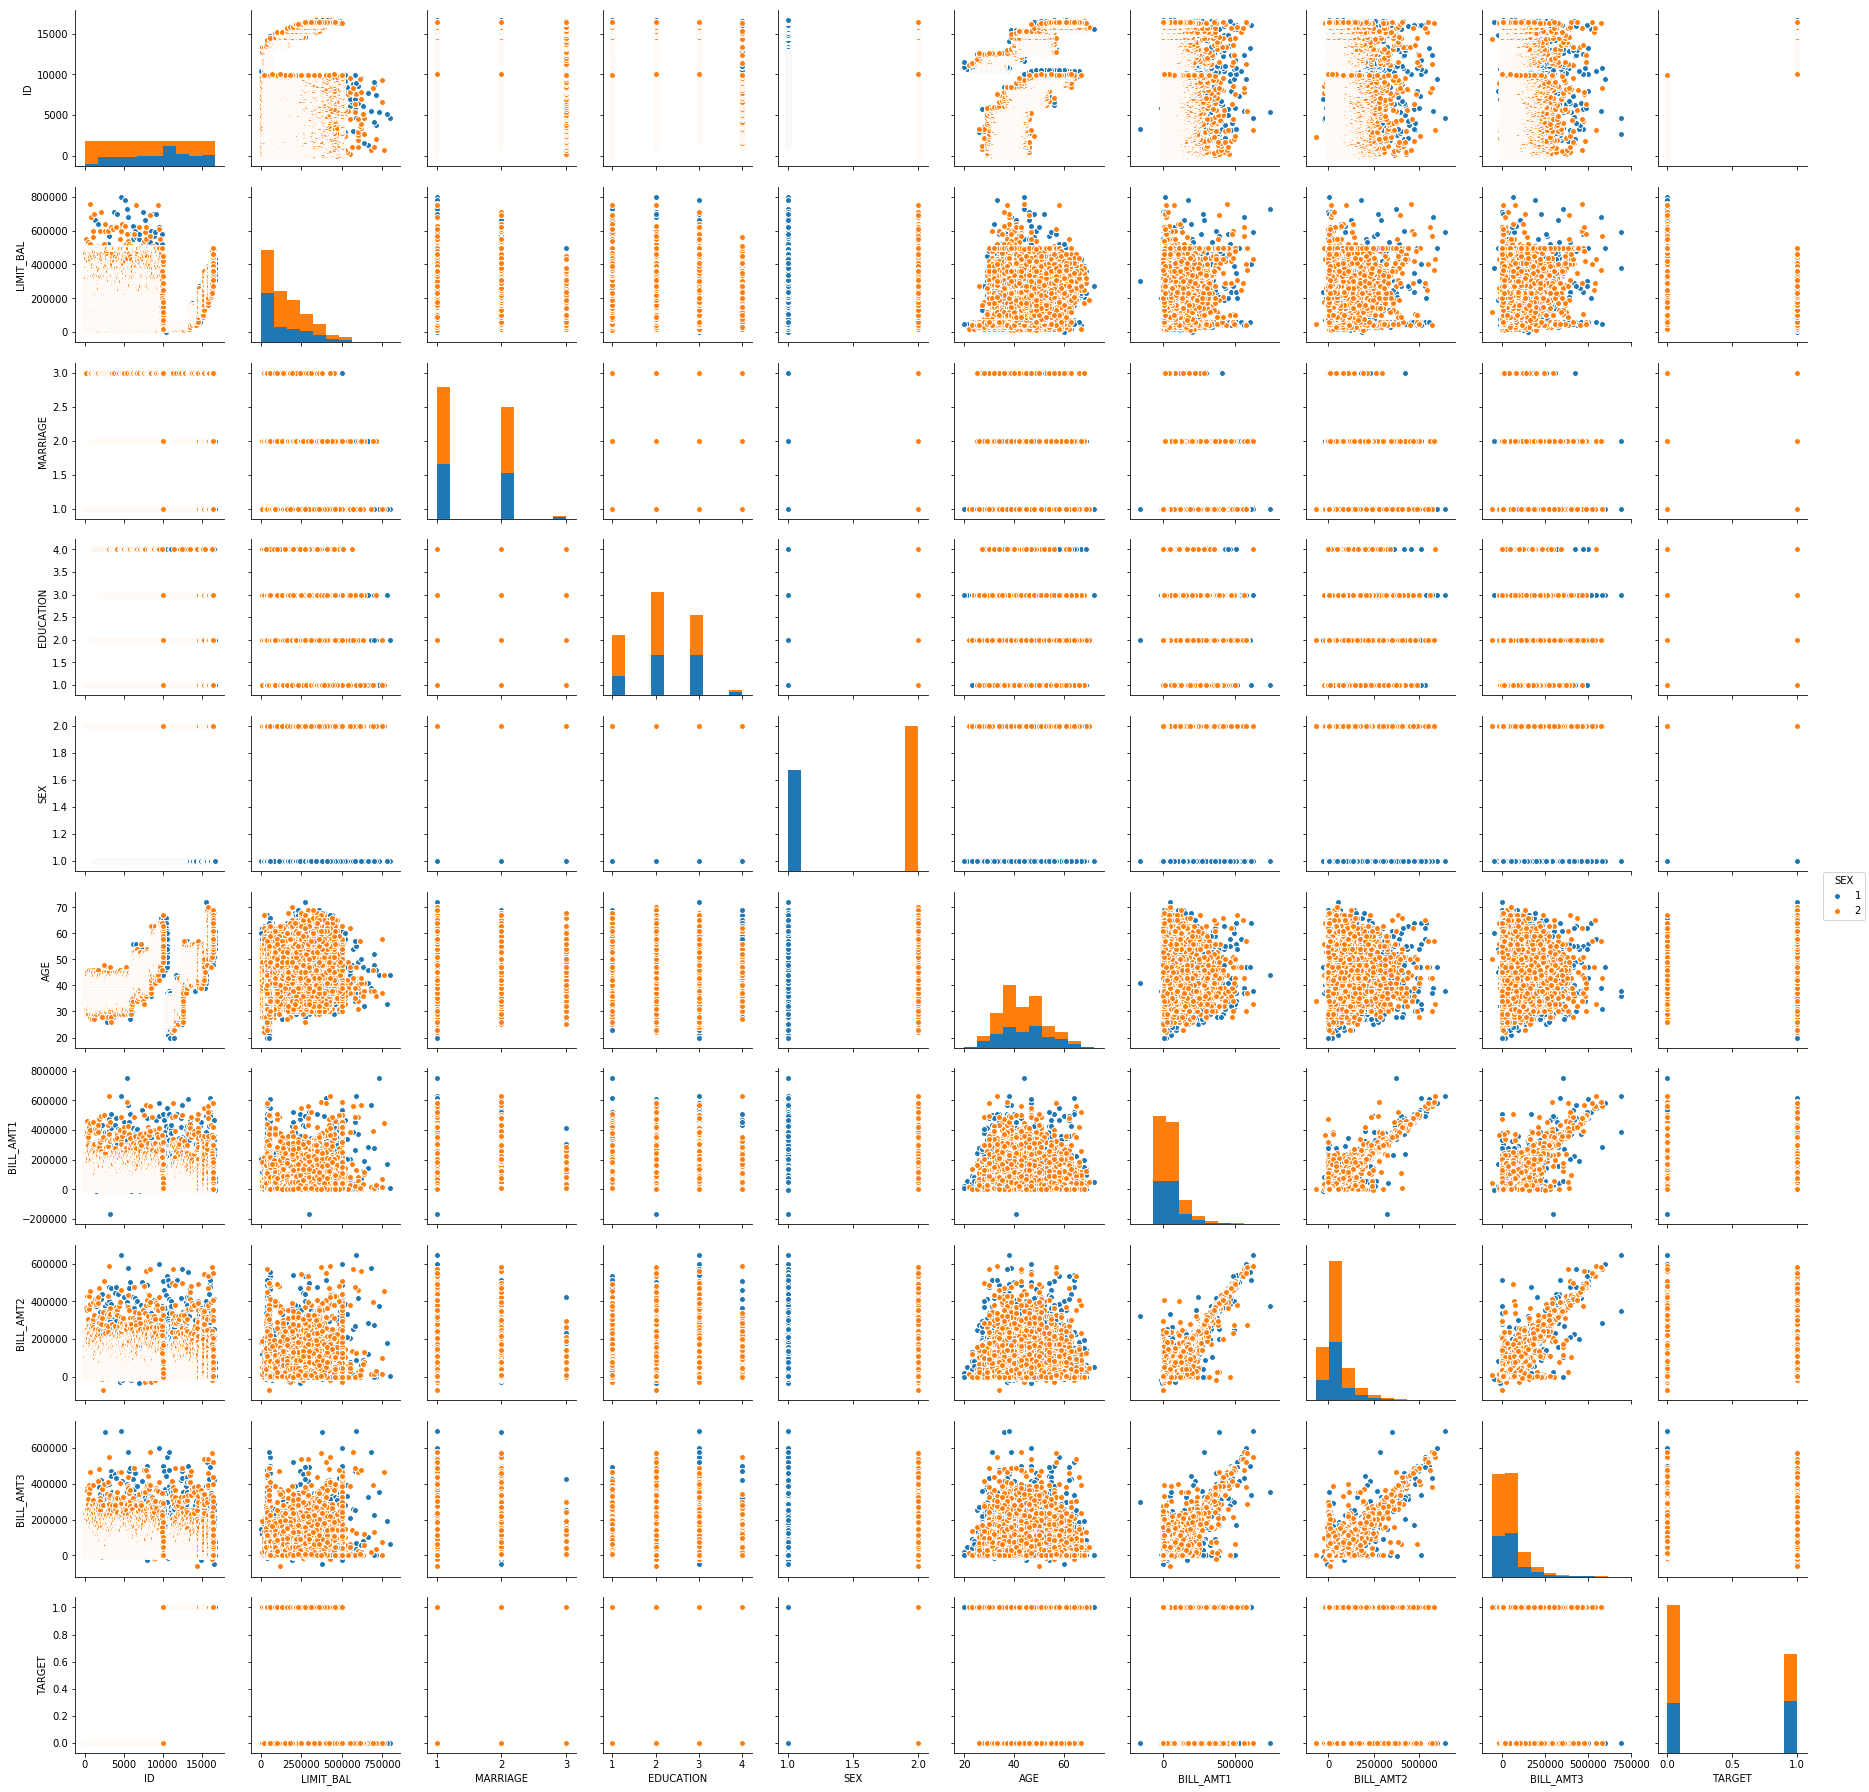

In [13]:
sns.pairplot(train,hue='SEX')

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: BILL_AMT1, dtype: object

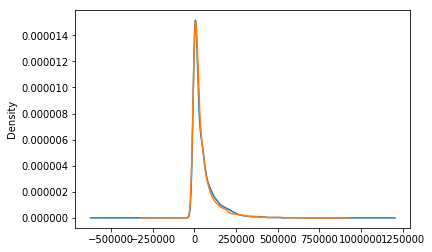

In [14]:
train.groupby('TARGET').BILL_AMT1.plot.density()